# Introduction to MCMC

-----

In this notebook, we introduce the use of Monte Carlo methods for sampling and other numerical operations, including numerical integration. These techniques form the basis for Markov chain Monte Carlo, or MCMC, which is used in probabilistic programming to determine model parameters from data.


-----

[int]: https://gist.github.com/AustinRochford/d83ecc6acd17a632a2b9df788386540b

## Table of Contents

[Uniform Sampling](#Uniform-Sampling)

[Computing Pi](#Computing-Pi)

[Monte Carlo Integration](#Monte-Carlo-Integration)



-----

Before proceeding with the rest of this notebook, we first include the notebook setup code.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

# Set global figure properties
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

# Set default Seaborn plotting style
sns.set_style('white')

-----

[[Back to TOC]](#Table-of-Contents)

## Uniform Sampling

The foundation for Monte Carlo techniques is the creation of random samples. In the following Code cell, we generate random samples across the unit square, which enables the application of subsequent Monte Carlo integration, or sampling from more complex functions, which forms the basis for Markov chain Monte Carlo methods. To do this, we create a NumPy `randomstate` object, which ensures reproducibility every time we run the notebook. The precision of any resulting Monte Carlo technique will be dependent on the number of simulated points. On the other hand, however, this value also impacts the computational time since more points means more evaluations. This number determines the key trade-off between accuracy and runtime.


-----
[wcn]: https://en.wikipedia.org/



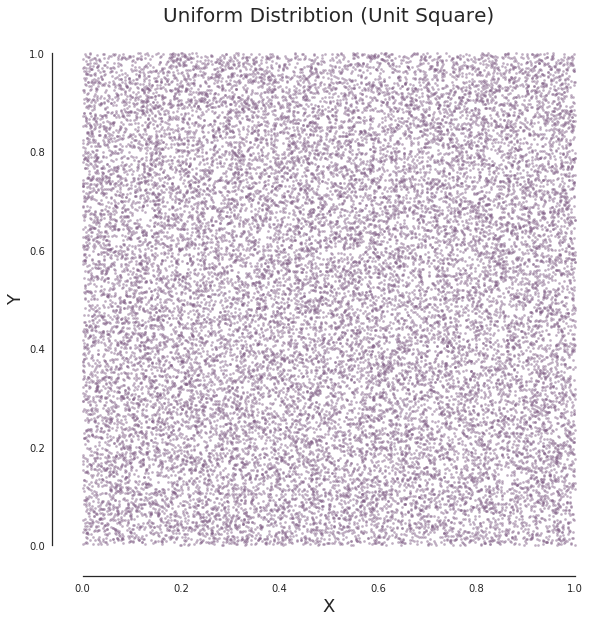

In [2]:
from numpy.random import RandomState
rng = RandomState(23)

# Number of sample points
num_pts = 25000

# Create empty state array
x, y = rng.uniform(0, 1, size=(2, num_pts))

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot box
ax.set_aspect('equal')
ax.scatter(x, y, s=5, c=sns.xkcd_rgb['dusty purple'], alpha=0.5)

# Decorate plot
ax.set(title='Uniform Distribtion (Unit Square)', 
       xlabel='X',
       ylabel='Y')

sns.despine(offset=5, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)

## Computing Pi

The value of Pi, the mathematical constant, is the ratio of a circle's circumference to its diameter. We can estimate this quantity by finding the ratio of the area of a quarter circle of radius one to the area of a unit sphere. Formally, this is known as Monte Carlo integration, which is discussed in the general case in the next section. To do this, we randomly distribute a large number of points inside he unit square, and next determine which points are also inside the quarter circle. 

We can find these points easily by using A NumPy mask array. The ratio of the number of these points is the same as the ratio of the area of the square to the area of the quarter circle. Multiplying this value by four gives us the area of a circle of radius one, which will be equal to the value of Pi. We compare our estimate to the value of Pi from the NumPy library, showing very close agreement (which will get closer as the number of simulated points increases.

-----
[wcn]: https://en.wikipedia.org/



In [3]:
# Function to tranform x to y on unit quarter circle.
def quarter_circle(x):
    return np.sqrt(1.0 - x**2)
    
# Define Boolean mask array for inside quarter circle
circle_mask = y < quarter_circle(x)

# Define x,y points on quarter circle
x_circle = np.linspace(0, 1, 1000)
y_circle = quarter_circle(x_circle)

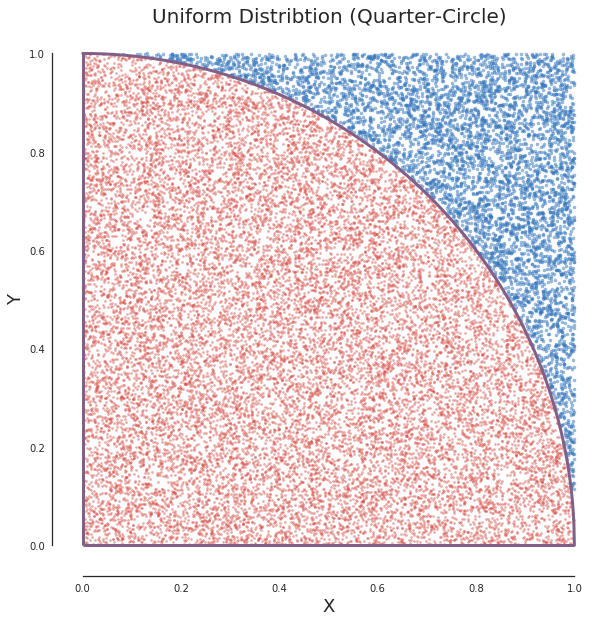

In [4]:
# Create figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot data, colored by inout of quarter-circle
ax.set_aspect('equal')
ax.scatter(x[circle_mask], y[circle_mask], s=5, c=sns.xkcd_rgb['pale red'], alpha=0.5)
ax.scatter(x[~circle_mask], y[~circle_mask], s=10, c=sns.xkcd_rgb['windows blue'], alpha=0.5)

# Draw quarter-circle
ax.plot(x_circle, y_circle, linewidth=3, c=sns.xkcd_rgb['dusty purple'])
ax.vlines(0, 0, 1.0, linewidth=3, colors=sns.xkcd_rgb['dusty purple'])
ax.hlines(0, 0, 1.0, linewidth=3, colors=sns.xkcd_rgb['dusty purple'])

# Decorate plot
ax.set(title='Uniform Distribtion (Quarter-Circle)', 
       xlabel='X',
       ylabel='Y')

sns.despine(offset=5, trim=True)

In [5]:
# Compute Pi

# MC Integration = ratio of points inside to all points
ratio = y[circle_mask].shape[0] / num_pts

print(f'Pi (estimate) = {4.0 * ratio:6.5f}')
print(f'Pi (actual)   = {np.pi:6.5f}')

Pi (estimate) = 3.13808
Pi (actual)   = 3.14159


-----

[[Back to TOC]](#Table-of-Contents)

## Monte Carlo Integration

The integral of a function is often used to compute the area under a curve. We can invert this concept to estimate an integral of an arbitrarily complex function. In this case, we use Monte Carlo to perform integration. We simulate a large number of random points, and compute the fraction of those points that lie under a given curve. The ratio of the points under the curve to the total number of points is the ratio of the area under the curve to the total area in he simulation zone. By using a simple simulation area (e.g., he are inside the unit square, which is one), the area under the curve can be easily calculated by the ratio of the number of sampled points.

-----

In [6]:
# Define complex function of interest
def the_func(x):
    return 0.5 * np.abs(np.sin(10. * x)**2 + np.cos(10.0 * x))
    
# Create Boolean mask array from function of interest
func_mask = y < the_func(x)

# Create x,y on function boundary
x_func = np.linspace(0, 1, 100)
y_func = the_func(x_func)

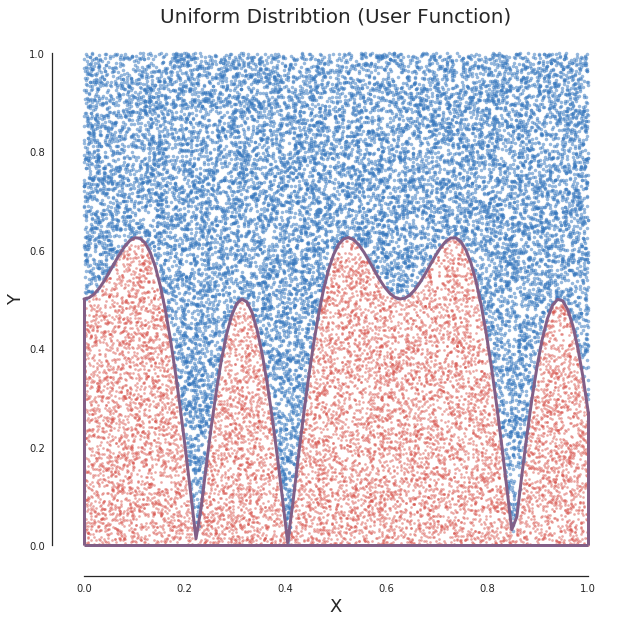

In [7]:
# Create figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot data, colored by in/out of Function
ax.scatter(x[func_mask], y[func_mask], s=5, c=sns.xkcd_rgb['pale red'], alpha=0.5)
ax.scatter(x[~func_mask], y[~func_mask], s=10, c=sns.xkcd_rgb['windows blue'], alpha=0.5)

# Draw Function
ax.plot(x_func, y_func, linewidth=3, c=sns.xkcd_rgb['dusty purple'])
ax.vlines(0, 0, y_func[0], linewidth=3, colors=sns.xkcd_rgb['dusty purple'])
ax.vlines(1, 0, y_func[-1], linewidth=3, colors=sns.xkcd_rgb['dusty purple'])
ax.hlines(0, 0, 1.0, linewidth=3, colors=sns.xkcd_rgb['dusty purple'])

# Decorate plot
ax.set(title='Uniform Distribtion (User Function)', 
       xlabel='X',
       ylabel='Y')

sns.despine(offset=5, trim=True)

In [8]:
# Compute Integral
ratio = y[func_mask].shape[0] / num_pts

# From Wolfram Alpha
answer = 0.432894

print(f'Integral (estimate) = {ratio:6.5f}')
print(f'Integral (actual)   = {answer:6.5f}')

Integral (estimate) = 0.43296
Integral (actual)   = 0.43289


-----

<font color='red' size = '5'> Student Exercise </font>


In the preceding cells, we introduced Monte Carlo methods, where we could use random samples to compute mathematical quantities. Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Change the calculation of PI to compute the area of the full circle (centered at zero and of radius one).
2. Try computing the integral of the function x * log(x).
3. Try computing the integral of the function exp(-sqrt(x)).

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. Wikipedia article on [Monte Carlo][wmcm] methods
1. Wikipedia article on [Monte Carlo][wmcm] integration

8. Introduction to [Markov chain Monte Carlo][jcmcmc]
9. Gentle introduction to [MCMC][[mcmcgi]
7. Blog article introducing [Monte Carlo Approximations][mca]
7. Blog article introducing [Markov chain Monte Carlo][twmcmc] sampling
7. Blog article introducing MCMC [Metropolis][mcms] sampling
77. Article discussing MCMC [Metropolis][mcmh] algorithm
7. Blog article introducing MCMC [Gibbs][mcgs] sampling
8. Article discussing [MCMC][cmcmc]
9. Article discussing the [application of MCMC][mcmcha]
10. PyMC3 based article on [mcmc][pymc3]
11. A discussion of [MCMC burn-in][mcbi]
12. A no-BS article on [MCMC][mcmcnb]
13. Article discussing [Hamiltonian MCMC][hmcmc]

-----

[wmcm]: https://en.wikipedia.org/wiki/Monte_Carlo_method
[wmci]: https://en.wikipedia.org/wiki/Monte_Carlo_integration

[mca]: https://theclevermachine.wordpress.com/2012/09/22/monte-carlo-approximations/

[mcms]: https://theclevermachine.wordpress.com/2012/10/05/mcmc-the-metropolis-sampler/

[jcmcmc]: https://www.johndcook.com/blog/2016/01/23/introduction-to-mcmc/

[twmcmc]: http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/

[mcbi]: https://www.johndcook.com/blog/2016/01/25/mcmc-burn-in/

[cmcmc]: http://www.lbreyer.com/classic.html

[mcmcgi]: https://theclevermachine.wordpress.com/2012/11/19/a-gentle-introduction-to-markov-chain-monte-carlo-mcmc/

[mcgs]: https://theclevermachine.wordpress.com/2012/11/05/mcmc-the-gibbs-sampler/

[mcmcha]: https://healthyalgorithms.com/2010/10/19/mcmc-in-python-how-to-stick-a-statistical-model-on-a-system-dynamics-model-in-pymc/

[mcmcnb]: https://jeremykun.com/2015/04/06/markov-chain-monte-carlo-without-all-the-bullshit/

[mcmh]: http://michaeljflynn.net/2015/06/01/my-favorite-algorithm-metropolis-hastings/

[hmcmc]: https://colcarroll.github.io/hamiltonian_monte_carlo_talk/bayes_talk.html

[pymc3]: https://github.com/fonnesbeck/PyMC3_DataScienceLA/blob/master/notebooks/2.%20Markov%20Chain%20Monte%20Carlo.ipynb

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode